# Loading Path Planning Track Visualization

In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval

in_file = '../data/logger.csv'
sample = pd.read_csv(in_file, sep=',')

sample.head()

,t,x,y,vd,xyd,nd
0,0,909.480,1128.67,0.000000,0.000000,6
1,1,909.539,1128.77,0.088400,0.442000,6
2,2,909.628,1128.77,0.088466,0.088463,6
3,3,909.716,1128.77,0.088604,0.088602,6
4,3,909.805,1128.77,0.088817,0.088814,6


In [2]:
sample.describe()

,t,x,y,vd,xyd,nd
count,64171.000000,64171.000000,64171.000000,64171.000000,64171.000000,64171.000000
mean,13532.199093,1361.970138,2141.923545,0.414667,0.414672,5.433950
std,7781.193140,766.538985,718.283916,0.045840,0.045822,3.181446
min,0.000000,152.870000,1124.620000,0.000000,0.000000,2.000000
25%,6758.500000,608.844000,1349.005000,0.393487,0.393506,2.000000
50%,13554.000000,1451.660000,2245.440000,0.441977,0.441977,6.000000
75%,20390.500000,2127.785000,2908.610000,0.442000,0.441999,10.000000
max,26810.000000,2343.650000,3005.860000,0.442000,0.442000,10.000000


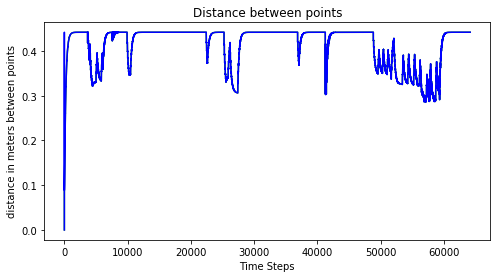

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline
sdistance = pd.Series(sample.vd)
xydistance = pd.Series(sample.xyd)
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4))
p0 = ax1.plot(sdistance.index, sdistance, 'g', label='delta s')
p1 = ax1.plot(xydistance.index, xydistance, 'b', label='delta xy')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("distance in meters between points", fontsize=10)
plt.title('Distance between points')
plt.show()

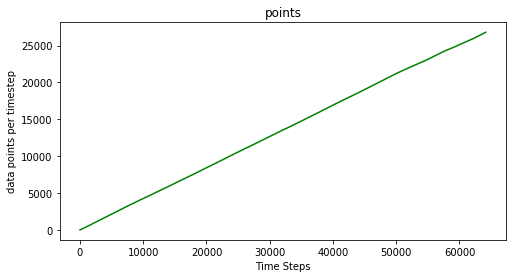

In [4]:
t = pd.Series(sample.t)
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4))
p0 = ax1.plot(t.index, t, 'g', label='delta s')
#p1 = ax1.plot(xydistance.index, xydistance, 'b', label='delta xy')
ax1.set_xlabel("Time Steps", fontsize=10)
ax1.set_ylabel("data points per timestep", fontsize=10)
plt.title('points')
plt.show()

In [5]:
waypoint_file = "../data/highway_map.csv"
logger_file = "../data/logger.csv"

with open(waypoint_file) as f:
    x_waypoint = []
    y_waypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(' ')
            x_waypoint.append(data[0])
            y_waypoint.append(data[1])
        count += 1

with open(logger_file) as f:
    x_path = []
    y_path = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(',')
            x_path.append(data[1])
            y_path.append(data[2])
        count += 1

x_start = [ x_path[0] ]
y_start = [ y_path[0] ]

x_current = [ x_path[len(x_path)-1] ]
y_current = [ y_path[len(y_path)-1] ]


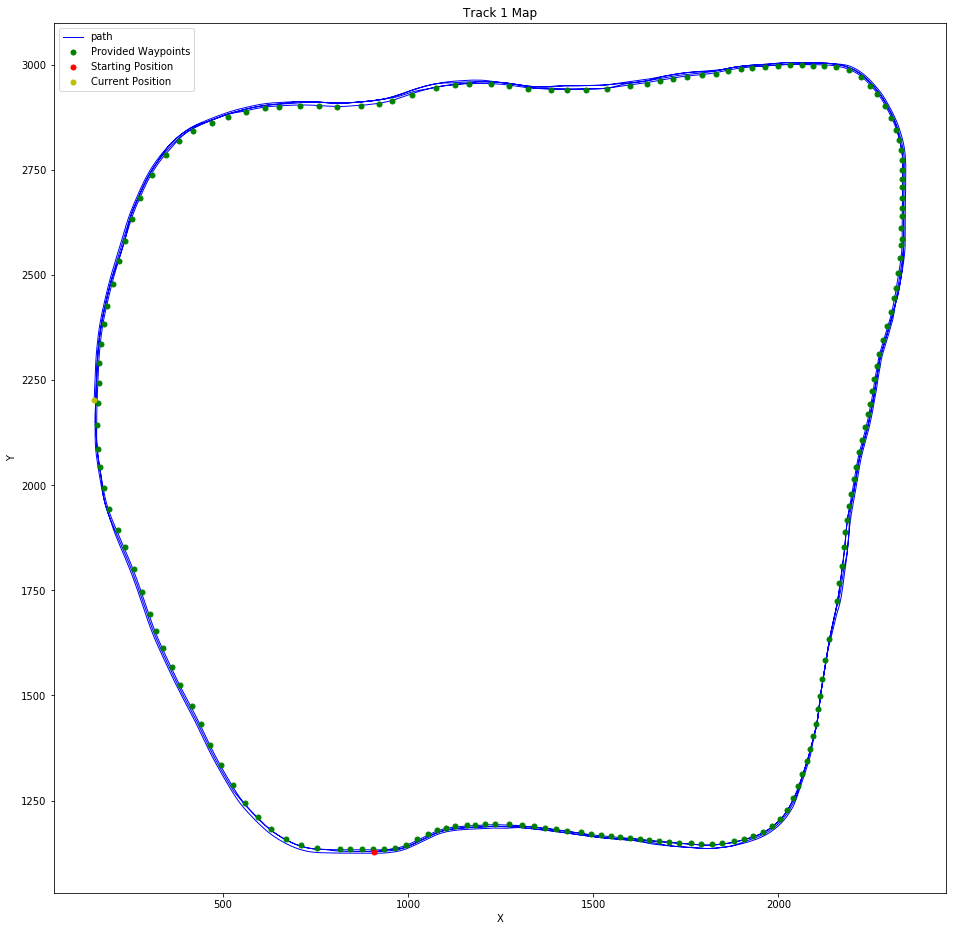

In [6]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot(x_path, y_path, 'b', lw=1.0)
p2 = plt.plot(x_waypoint, y_waypoint, 'go', ms=5.0)
p3 = plt.plot(x_start, y_start, 'ro', ms=5.0)
p4 = plt.plot(x_current, y_current, 'yo', ms=5.0)
plt.title('Track 1 Map')
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0],p2[0], p3[0],p4[0]), ('path','Provided Waypoints', 'Starting Position','Current Position'))
plt.show()